## Requirements

In [ ]:
# installing the required roux subpackage
!pip install roux[stat]

## Example: Demo data

In [8]:
from roux.lib.io import read_table,to_table
## reading a table generated using the roux_query.ipynb notebook
df01=read_table('tests/output/data/biomart/00_raw.tsv')

INFO:root:shape = (167181, 5)


In [9]:
from roux.lib.io import *

In [12]:
df1=df01.log.drop_duplicates(subset=['Gene stable ID','Gene % GC content'])

INFO:root:drop_duplicates: shape changed: (167181, 5)->(22802, 5), width constant


In [13]:
df1.head(1)

,Gene stable ID,HGNC symbol,Gene % GC content,Transcript count,Transcript length (including UTRs and CDS)
0,ENSG00000198888,MT-ND1,47.7,1,956


In [14]:
to_table(df1,'tests/output/data/biomart/01_dedup.tsv')

'data/biomart/01_dedup.tsv'

## Documentation
[`roux.lib.io`](https://github.com/rraadd88/roux/wiki/roux.lib#rouxlibio-module)

## Example: fitting a Gaussian-Mixture Model

In [25]:
from roux.lib.io import read_table
df1=read_table('tests/output/data/biomart/01_dedup.tsv')

INFO:root:shape = (22802, 5)


INFO:root:intersections [46.95]


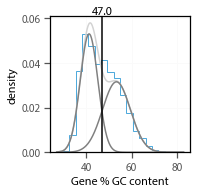

In [31]:
from roux.stat.cluster import cluster_1d
from roux.viz.io import to_plot
d1=cluster_1d(
    ds=df1['Gene % GC content'].copy(),
    n_clusters=2,
    clf_type='gmm',
    random_state=88,
    returns=['coff','mix_pdf','two_pdfs','weights'],
    ax=None,
    bins=60,
    test=True,
)
ax=plt.gca()
ax.set(xlabel='Gene % GC content',ylabel='density')
to_plot('plot/hist_gmm.png')
assert exists('tests/output/plot/hist_gmm.png')

## Documentation
[`roux.stat.cluster`](https://github.com/rraadd88/roux/wiki/roux.stat#rouxstatcluster-module)